# Gaussian Mixture Models Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem definition

$$\mathcal{N} (\mathbf{x} | \mathbf{\mu}^{(c)}, \Sigma^{(c)})= \frac{1}{(2\pi)^\frac{n}{2}\lvert{\Sigma^{(c)}}\rvert^\frac{1}{2}}e^{(-\frac{1}{2}(\mathbf{x} -\mathbf{\mu}^{(c)})^T\Sigma^{(c)-1}(\mathbf{x} - \mathbf{\mu}^{(c)}))}$$

<img src = "../figures/em2.png" height=400>

We shall also further define $\pi^{(c)}$, which is simply the probability of being in the cluster (think of it as $p(y)$).  Since $\pi$ is the probability of each cluster, it should sum to 1.

$$\quad 0 \leq \pi^{(c)} \leq 1 \quad ; \quad \sum\limits_{c=1}^k \pi^{(c)}=1$$

Then, using **Baye's theorem**, we can define the likelihood of a sample $\mathbf{x}^{(i)}$ belong to a cluster $c$ as simply:

$$p(y|x) = p(y) * p(x | y)$$
$$p(c | \mathbf{x}^{(i)}) = \pi^{(c)} * \mathcal{N} (\mathbf{x}^{(i)} | \mathbf{\mu}^{(c)}, \Sigma^{(c)}) $$

Finally, based on all the information, GMM defines its objective, i.e., to maximize

$$\prod \limits_{i=1}^m \sum_{c=1}^k \pi^{(c)} \mathcal{N} (\mathbf{x}^{(i)} | \mathbf{\mu}^{(c)}, \Sigma^{(c)})$$

## Derivatives

Our objective function is to find $\theta$ that maximize the log-likehood $\mathcal{L}$.  (Here we apply $\log$ for mathematical stability.)

$$\max_\theta \sum\limits_{i=1}^m \log \sum\limits_{c=1}^k \pi^{(c)} \mathcal{N}(\mathbf{x} | \mu^{(c)}, \Sigma^{(c)})$$

Our "normal" procedure would be to compute the gradient $\frac{d\mathcal{L}}{d\theta}$ and set it to 0.  however, if you try this yourself at home, you will find that it is not possible to find the closed form.

### Responsibilities $r$

Before anything, let us introduce a quantity that will play a central role in this algorithm: **responsibilities**.  We define the quantity

$$ r^{(i)}_{c} = \frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}$$ 

$r^{(i)}_{c}$ basically gives us $$ \frac{\text{Probability of $\mathbf{x}^{(i)}$ belonging to cluster c}}{\text{Probability of $\mathbf{x}^{(i)}$ over all clusters}} $$

Note that $r$ for a sample $i$ 

$$r^{(i)} = r^{(i)}_1, r^{(i)}_2, \cdots, r^{(i)}_k \in \mathbb{R}^k$$

$$\sum\limits_{c=1}^{k}r^{(i)}_c = 1$$

$$ r^{(i)}_c \geq 0 $$

### EM algorithm

Notice that $r$ actually depends on **mean, covariance and pi**.  But then, **mean, covariance, and pi** also depends on $r$.  Based on this, we can use EM algorithm, where we can (1) create a random mean, covariance, and pi, (2) calculate $r$, and then repeat 1 and 2 until certain stopping criteria.

### Total responsibility $N^{(c)}$

By summing all the total responsibility of the $c$ th cluster along all samples, we get $N^{(c)}$.

$$N_c = \sum\limits_{i=1}^{m}r^{(i)}_c \in \mathbb{R}^k $$

Note that this value does not necessarily sum to 1.

### Updating the mean

The update of the mean $\mu^{(c)}$ is given by:

$$ \mu_\text{new}^{(c)} = \frac{\sum\limits_{i=1}^{m}r^{(i)}_{c}\mathbf{x}^{(i)}}{\sum\limits_{i=1}^{m}r^{(i)}_{c}}$$

### Updating the covariances

The update of the covariance $\Sigma^{(c)}$ is given by:

$$ \Sigma^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T $$

### Updating the pi

The update of the mixture weights $\pi^{(c)}$:

$$ \pi^{(c)}_\text{new} = \frac{N^{(c)}}{m}$$

## Let's code!

### Step 1: Define k random clusters

Define k clusters from k random number of gaussian distribution.  Specifically, for each cluster $c$, randomly initialize parameters mean $\mathbf{\mu}^{(c)}$, covariance $\Sigma^{(c)}$, fraction per class $\pi^{(c)}$ and responsiblities (likelihood) of each sample $r^{(i)}_{c}$ 
    
Recall that gaussian distribution is parametrized by the mean $\mathbf{\mu}$ and the covariance $\Sigma$


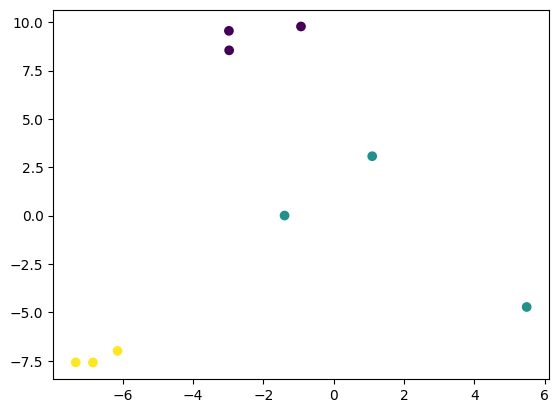

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=9, cluster_std=[1.0, 3.5, 0.5], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c =y);

### 1.1 Define means

In [3]:
#define number of cluster (use domain knowledge or elbow rule)
k = 3

#get m and n
m, n = X.shape

#first, initialize mean
random_row = np.random.randint(low=0, high=m, size=k)
mean = np.array([X[idx,:] for idx in random_row ]).T



In [4]:
print("X: ", X)

X:  [[ 5.48674679e+00 -4.72331117e+00]
 [-2.97867201e+00  9.55684617e+00]
 [ 1.09496992e+00  3.07303535e+00]
 [-9.29984808e-01  9.78172086e+00]
 [-7.33363923e+00 -7.58626144e+00]
 [-6.14680281e+00 -6.99299774e+00]
 [-1.39733358e+00  5.16333160e-03]
 [-2.97261532e+00  8.54855637e+00]
 [-6.84586309e+00 -7.59248369e+00]]


In [5]:
print("Mean: ", mean)  #shape: n, k  (mean for each feature for each cluster)

Mean:  [[-7.33363923e+00 -1.39733358e+00 -2.97261532e+00]
 [-7.58626144e+00  5.16333160e-03  8.54855637e+00]]


### 1.2 Define covariance

In [6]:
cov = np.array([np.cov(X.T) for _ in range (k)])

In [7]:
print("Cov: ", cov) #shape: k, n, n (covriance matrix (n x n) for each cluster)

Cov:  [[[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]]


For those who forget about covariance matrix, 

$$\text{cov}(a) = \text{var}(a) = \sum_i^m \frac{(a^i - \mu)^2}{m}$$

$$\text{cov}(a, b) = \sum_i^m \frac{(a^i - \mu)(b^i - \mu)}{m}$$

### 1.3 Define pi

In [8]:
#initialize the weights (here we called pi)
pi = np.full((k, ), fill_value=1/k) #simply use 1/k for pi
print("PI (weights; must add up to 1): ", pi)  #shape: (k, ) - similar to p(y) of each cluster

PI (weights; must add up to 1):  [0.33333333 0.33333333 0.33333333]


### 1.4 Define responsibilities

In [9]:
r = np.full(shape=(m, k), fill_value=1/k)
print("Responsilibities (likelihood - add up to 1): ", r) #shape: (m, k) - the likelihood of each sample belonging to each cluster

Responsilibities (likelihood - add up to 1):  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


## Step 2: EM-step

Repeat until converged:

   1. *E-step*: for each sample $\mathbf{x}^{(i)}$, evaluate responsibilities $r^{(i)}_{c}$ for every data point $\mathbf{x}^{(i)}$ using 

$$ r^{(i)}_{c} = \frac{\pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}{\Sigma_{c=1}^{k} \pi^{(c)}\mathcal{N}(\mathbf{x}^{(i)} \mid \mu^{(c)}, \Sigma^{(c)})}$$

   2. *M-step*: for each cluster, update the gaussian distribution of each cluster, i.e., restimate parameters $\pi^{(c)}, \mu^{(c)}, \Sigma^{(c)}, N^{(c)}$ using the updated responsibilites $r^{(i)}_{c}$.

$$N^{(c)} = \sum\limits_{i=1}^{m}r^{(i)}_c$$

$$ \mu^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}\mathbf{x}^{(i)}$$

$$ \Sigma^{(c)}_\text{new} = \frac{1}{N^{(c)}} \sum\limits_{i=1}^{m}r^{(i)}_{c}(\mathbf{x}^{(i)} - \mu^{(c)})(\mathbf{x}^{(i)} - \mu^{(c)})^T$$

$$ \pi^{(c)}_\text{new} = \frac{N^{(c)}}{m}$$




### 2.1 E-Step

In [10]:
from scipy.stats import multivariate_normal
for i in range(m):
    for c in range(k):
        xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, c], cov=cov[c])
        r[i, c] = pi[c] * xi_pdf
    r[i] /= np.sum(r[i])

print("Shape of r: ", r.shape)  #likelihood for each sample for each cluster
print("r: ", r)

Shape of r:  (9, 3)
r:  [[0.05012958 0.90969232 0.04017811]
 [0.05035365 0.23436716 0.71527919]
 [0.07040582 0.65156893 0.27802525]
 [0.03486987 0.30712846 0.65800167]
 [0.72008005 0.21366709 0.06625286]
 [0.63733069 0.28447817 0.07819114]
 [0.17547592 0.5913719  0.23315218]
 [0.0619053  0.26526676 0.67282794]
 [0.69417744 0.23856359 0.06725897]]


### 2.2 M-Step

In [11]:
r

array([[0.05012958, 0.90969232, 0.04017811],
       [0.05035365, 0.23436716, 0.71527919],
       [0.07040582, 0.65156893, 0.27802525],
       [0.03486987, 0.30712846, 0.65800167],
       [0.72008005, 0.21366709, 0.06625286],
       [0.63733069, 0.28447817, 0.07819114],
       [0.17547592, 0.5913719 , 0.23315218],
       [0.0619053 , 0.26526676, 0.67282794],
       [0.69417744, 0.23856359, 0.06725897]])

In [12]:
Nc = np.sum(r, axis=0)

In [13]:
Nc

array([2.49472832, 3.69610436, 2.80916731])

### 2.3 Update Pi

In [14]:
#Update pi
print("Pi (before): ", pi)
pi = Nc / m
assert pi.shape == (k, )
print("Pi (after): ", pi)

Pi (before):  [0.33333333 0.33333333 0.33333333]
Pi (after):  [0.27719204 0.41067826 0.3121297 ]


### 2.4 Update mean

In [15]:
#Update mean
print("X.T: ", X.T) #(n, m)
print("r: ", r) #(m, k)
print("X.T @ r ", X.T @ r)
print("Nc: ", Nc)
print("Mean (before) ", mean) #(n, k)
mean =  ( X.T @ r ) / Nc
assert mean.shape == (n, k)
print("Mean (after) ", mean) #(n, k)

X.T:  [[ 5.48674679e+00 -2.97867201e+00  1.09496992e+00 -9.29984808e-01
  -7.33363923e+00 -6.14680281e+00 -1.39733358e+00 -2.97261532e+00
  -6.84586309e+00]
 [-4.72331117e+00  9.55684617e+00  3.07303535e+00  9.78172086e+00
  -7.58626144e+00 -6.99299774e+00  5.16333160e-03  8.54855637e+00
  -7.59248369e+00]]
r:  [[0.05012958 0.90969232 0.04017811]
 [0.05035365 0.23436716 0.71527919]
 [0.07040582 0.65156893 0.27802525]
 [0.03486987 0.30712846 0.65800167]
 [0.72008005 0.21366709 0.06625286]
 [0.63733069 0.28447817 0.07819114]
 [0.17547592 0.5913719  0.23315218]
 [0.0619053  0.26526676 0.67282794]
 [0.69417744 0.23856359 0.06725897]]
X.T @ r  [[-14.21009106  -1.84267     -5.97043306]
 [-13.85810007  -0.20128837  18.12965648]]
Nc:  [2.49472832 3.69610436 2.80916731]
Mean (before)  [[-7.33363923e+00 -1.39733358e+00 -2.97261532e+00]
 [-7.58626144e+00  5.16333160e-03  8.54855637e+00]]
Mean (after)  [[-5.69604751 -0.49854382 -2.12533908]
 [-5.5549536  -0.0544596   6.45374748]]


### 2.5 Update covariance

In [16]:
print("Cov (before) ", cov) #(n, k)

Cov (before)  [[[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]

 [[17.04621881  9.37794282]
  [ 9.37794282 56.76310386]]]


In [17]:
#covariance (also called Sigma)
for c in range(k):
    for i in range(m):
        X_mean = (X[i]-mean[:, c]).reshape(-1, 1)
        cov[c] += r[i, c] * (X_mean @ X_mean.T)
    cov[c] /= Nc[c]
assert cov.shape == (k, n, n)

print("Cov (after) ", cov) #(n, k)

Cov (after)  [[[13.79151953 11.86206835]
  [11.86206835 42.74987185]]

 [[22.60723968  2.21841733]
  [ 2.21841733 52.30862036]]

 [[10.28262929  5.30410461]
  [ 5.30410461 47.07843598]]]


## Step 3: Predict

In [18]:
r

array([[0.05012958, 0.90969232, 0.04017811],
       [0.05035365, 0.23436716, 0.71527919],
       [0.07040582, 0.65156893, 0.27802525],
       [0.03486987, 0.30712846, 0.65800167],
       [0.72008005, 0.21366709, 0.06625286],
       [0.63733069, 0.28447817, 0.07819114],
       [0.17547592, 0.5913719 , 0.23315218],
       [0.0619053 , 0.26526676, 0.67282794],
       [0.69417744, 0.23856359, 0.06725897]])

In [19]:
yhat = np.argmax(r, axis=1)
print(yhat)

[1 2 1 2 0 0 1 2 0]


## Putting everything together

Text(0.5, 1.0, 'Final')

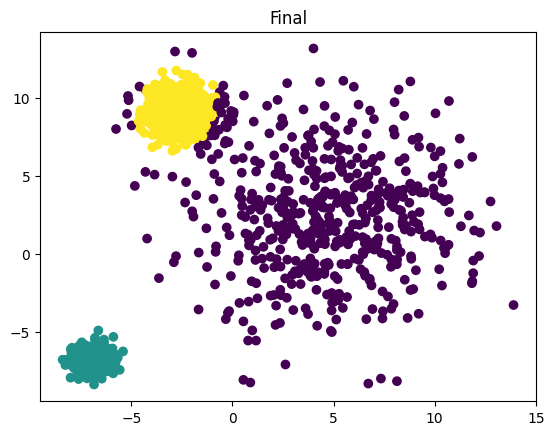

In [20]:
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for c in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, c], cov=cov[c])
            r[i, c] = pi[c] * xi_pdf
        r[i] /= np.sum(r[i])
    
    #===M-Step====
    # Find NK first for latter use
    Nc = np.sum(r, axis=0)
    assert Nc.shape == (K, )
    
    #PI
    pi = Nc / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / Nc
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    cov = np.zeros((K, n, n))
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= Nc[k]
    assert cov.shape == (K, n, n)
        

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")